# SYS 611: Buffon's Needle (Monte Carlo Simulation with Antithetic Variables)

Paul T. Grogan <pgrogan@stevens.edu>

This example shows how to conduct a Monte Carlo simulation for the Buffon's Needle problem using antithetic variables.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `numpy`, `scipy.stats`, and `matplotlib.pyplot` libraries.

In [20]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the numpy library and refer to it as `np`
import numpy as np

# import the scipy.stats library and refer to it as `stats`
import scipy.stats as stats

# import the matplotlib pyplot package and refer to it as `plt`
import matplotlib.pyplot as plt

## Problem Configuration

Two variables set the line width (spacing between lines) and needle length.

In [21]:
line_width = 3.0
needle_length = 2.5

## Sample Generator

The `drop_needle` function defines a process generator for the derived random variable whether a dropped needle crosses a line. This implementation uses antithetic variables to reduce variation across samples.

In [22]:
def drop_needle():
    r_1 = np.random.rand()
    r_2 = np.random.rand()
    # generate distance between needle centroid and nearest line from uniform 
    # distribution between 0 and line_width/2
    d_1 = r_1*line_width/2
    d_2 = (1-r_1)*line_width/2
    # generate acute angle between needle and line from uniform distribution
    # between 0 and pi/2 radians
    theta_1 = r_2*np.pi/2
    theta_2 = (1-r_2)*np.pi/2
    
    # for each antithetic variable, record 1 if d < needle_length/2*sin(theta)
    # otherwise record 0
    x_1 = 1 if d_1 < needle_length/2*np.sin(theta_1) else 0
    x_2 = 1 if d_2 < needle_length/2*np.sin(theta_2) else 0
    # return the average of the two antithetic variables
    return (x_1+x_2)/2.

## Monte Carlo Simulation

This section sets up and performs a Monte Carlo simulation.

In [23]:
# set the random number generator seed to 0
np.random.seed(0)

# generate 850 samples
samples = [drop_needle() for i in range(850)]

# compute the lower and upper-bounds using a 95% confidence interval
confidence_level = 0.05
z_crit = stats.norm.ppf(1-confidence_level/2)

print('p = {:.3f} +/- {:.3f} (95% CI)'.format(
        np.average(samples),
        z_crit*stats.sem(samples)
    ))

# compute the exact solution, as solved by calculus
solution = 2*needle_length/(line_width*np.pi)

print('exact: p = {:.3f}'.format(solution))

p = 0.522 +/- 0.010 (95% CI)
exact: p = 0.531


## Visualizing Running Statistics

Alternatively, one can visualize the running statistics throughout the Monte Carlo simulation, illustrating convergence to the expected value.

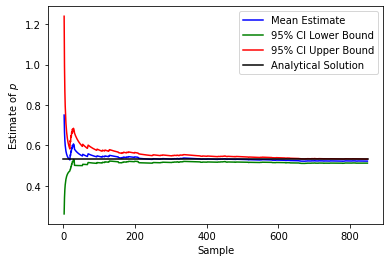

In [24]:
# compute running statistics for mean and confidence interval
mean_estimate = np.array([np.average(samples[0:i]) for i in range(2,len(samples))])
confidence_int = z_crit*np.array([stats.sem(samples[0:i]) for i in range(2,len(samples))])

# create a plot to show the mean estimate with 95% confidence interval bounds
plt.figure()
plt.plot(range(2,len(samples)), mean_estimate, 
         'b', label='Mean Estimate')
plt.plot(range(2,len(samples)), mean_estimate-confidence_int, 
         'g', label='95% CI Lower Bound')
plt.plot(range(2,len(samples)), mean_estimate+confidence_int, 
         'r', label='95% CI Upper Bound')
plt.plot([0, len(samples)], [solution, solution], 
          '-k', label='Analytical Solution')
plt.xlabel('Sample')
plt.ylabel('Estimate of $p$')
plt.legend(loc='best')
plt.show()

## Estimating Pi

Recall that the probability of a needle crossing a line is `p=(2*needle_length)(line_width*pi)` and, equivalently, pi is equal to `(2*needle_length)/(line_width*p)`. This result can be used to scale the estimates obtained from the Monte Carlo simulation.

pi = 3.194 +/- 0.062 (95% CI)


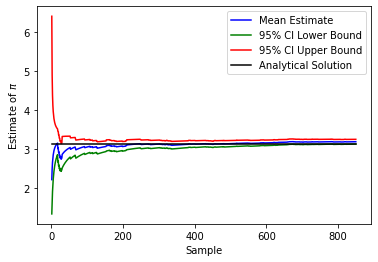

In [25]:
# transform the mean estimate to estimate pi using the solution form
pi_estimate = 2*needle_length/(line_width*mean_estimate)
pi_lower_bound = 2*needle_length/(line_width*(mean_estimate+confidence_int))
pi_upper_bound = 2*needle_length/(line_width*(mean_estimate-confidence_int))

print('pi = {:.3f} +/- {:.3f} (95% CI)'.format(
        pi_estimate[-1],
        pi_upper_bound[-1] - pi_estimate[-1]
    ))

# create a plot to show the pi estimate with 95% confidence interval bounds
plt.figure()
plt.plot(range(2,len(samples)), pi_estimate, 
         'b', label='Mean Estimate')
plt.plot(range(2,len(samples)), pi_lower_bound, 
         'g', label='95% CI Lower Bound')
plt.plot(range(2,len(samples)), pi_upper_bound, 
         'r', label='95% CI Upper Bound')
plt.plot([2, len(samples)], [np.pi, np.pi], 
         '-k', label='Analytical Solution')
plt.xlabel('Sample')
plt.ylabel('Estimate of $\pi$')
plt.legend(loc='best')
plt.show()